In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:

# Define calibration parameters
A = np.array([[0.994755, 0.005890, -0.000562],  # 'A^-1' matrix from Magneto
              [0.005890, 0.969793, 0.009452],
              [-0.000562, 0.001829, 0.997962]])
# 'Combined bias (b)' vector from Magneto
b = np.array([-265.378531, -50.558054, 23.668844])

# Read raw data and apply calibration
rawData = np.genfromtxt('data/accel1.txt',
                        delimiter='\t')  # raw measurement file
units = 'G\'s'  # units of accelerometer measurements (used for axis labels)

N = len(rawData)
calibData = np.zeros((N, 3), dtype='float')
for i in range(N):
    currMeas = np.array([rawData[i, 0], rawData[i, 1], rawData[i, 2]])
    calibData[i, :] = A @ (currMeas - b)


(-4815.340708471665, 4520.154877904958, -4507.711034097063, 4565.414811147479)

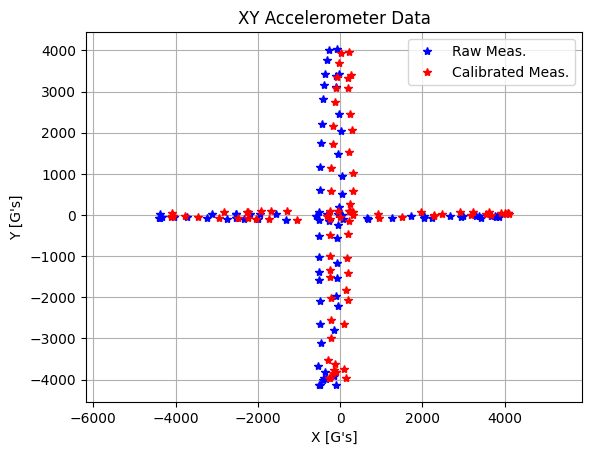

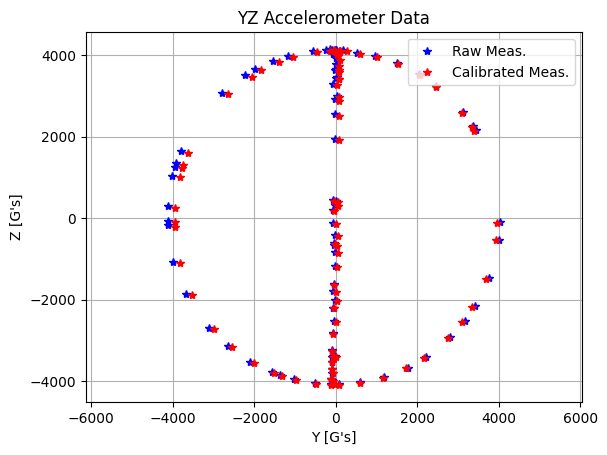

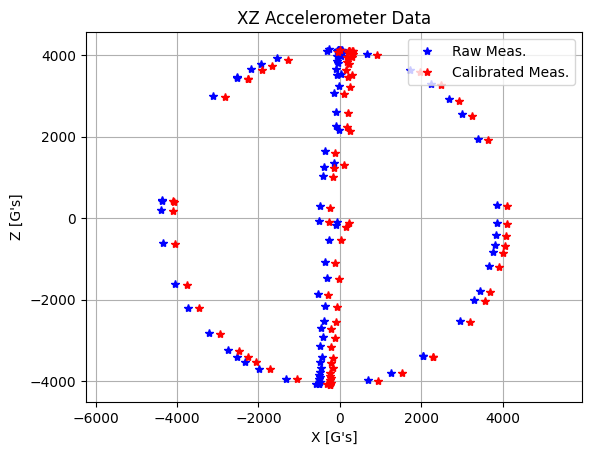

In [17]:
# Plot XY data
plt.figure()
plt.plot(rawData[:, 0], rawData[:, 1], 'b*', label='Raw Meas.')
plt.plot(calibData[:, 0], calibData[:, 1], 'r*', label='Calibrated Meas.')
plt.title('XY Accelerometer Data')
plt.xlabel('X [{}]'.format(units))
plt.ylabel('Y [{}]'.format(units))
plt.legend()
plt.grid()
plt.axis('equal')

# Plot YZ data
plt.figure()
plt.plot(rawData[:, 1], rawData[:, 2], 'b*', label='Raw Meas.')
plt.plot(calibData[:, 1], calibData[:, 2], 'r*', label='Calibrated Meas.')
plt.title('YZ Accelerometer Data')
plt.xlabel('Y [{}]'.format(units))
plt.ylabel('Z [{}]'.format(units))
plt.legend()
plt.grid()
plt.axis('equal')

# Plot XZ data
plt.figure()
plt.plot(rawData[:, 0], rawData[:, 2], 'b*', label='Raw Meas.')
plt.plot(calibData[:, 0], calibData[:, 2], 'r*', label='Calibrated Meas.')
plt.title('XZ Accelerometer Data')
plt.xlabel('X [{}]'.format(units))
plt.ylabel('Z [{}]'.format(units))
plt.legend()
plt.grid()
plt.axis('equal')


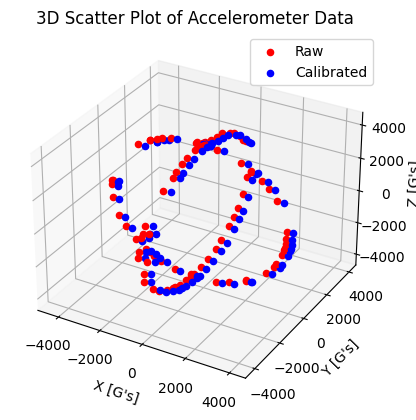

In [18]:

# Plot 3D scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(N):
    xraw = rawData[i, 0]
    yraw = rawData[i, 1]
    zraw = rawData[i, 2]

    xcalib = calibData[i, 0]
    ycalib = calibData[i, 1]
    zcalib = calibData[i, 2]
    ax.scatter(xraw, yraw, zraw, color='r', label='Raw')
    ax.scatter(xcalib, ycalib, zcalib, color='b', label='Calibrated')

ax.set_title('3D Scatter Plot of Accelerometer Data')
ax.set_xlabel('X [{}]'.format(units))
ax.set_ylabel('Y [{}]'.format(units))
ax.set_zlabel('Z [{}]'.format(units))
ax.legend(['Raw', 'Calibrated'])

plt.show()